# Exercici 1

Agafa un conjunt de dades d'un tema que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 

In [2]:
df = pd.read_csv("heart_2020.csv")
#source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [14]:
df.head()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


This dataset is the 2020 annual CDC survey data of 400k adults related to their health status. People were asked about the following:
* If they have heart disease
* Their body mass index (kg/m2)
* If they are or were smokers
* If they are heavy drinkers
* If they ever had a stroke
* Their physical and mental health during the last 30 days
* If they have difficulties walking
* Their sex
* Their age
* Their race
* If they are diabetic
* If they were physically active outside their job during the last 30 days
* Their general health
* Their average sleep time
* If they have asthma
* If they had cronic kidney disease
* If they ever had skin cancer

We will take the SleepTime category to assess its p-value. Our null hypothesis (H0) is that this data has a normal distribution, that is that it follows a Gaussian distribution, and our alternative hypothesis (H1) is that it does not. We will take an alfa of 0.05, and that means that in order to reject the null hypothesis, the p-value has to be less than 0.05. 

In [15]:
#using d'Agostino test
scipy.stats.normaltest(df["SleepTime"])

NormaltestResult(statistic=68385.83651409677, pvalue=0.0)

In [46]:
#using Shapiro-Wilk test
#since it can only use up to 2000 values, we take a random sample of it
sleeptime = df["SleepTime"].sample(n = 2000)
scipy.stats.shapiro(sleeptime)

(0.8938275575637817, 4.4864917252447845e-35)

In [10]:
#using Anderson-Darling test
scipy.stats.anderson(df["SleepTime"])

AndersonResult(statistic=10236.58167579223, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Text(0.5, 0, 'Sleep time in hours')

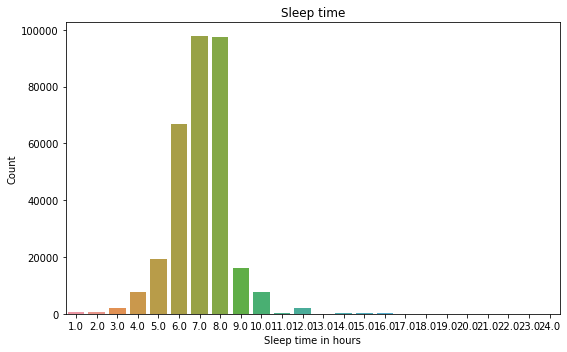

In [22]:
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = df["SleepTime"])
plt.title("How many hours do you sleep per day?")
plt.ylabel("Count")
plt.xlabel("Sleep time in hours")

All tests give us evidence to reject the null hypothesis and we can conclude that SleepTime doesn't follow a normal distribution. D'Agostino and Shapiro-Wilk tests calculated a p-value of 0.0, though that does not mean it is equal to 0, it is just a very small value and it is rounded to 0.0. Since the p-value < 0.05, we can reject the null hypothesis.

The Anderson-Darling does not return a p-value, but calculates critical values, which is another aproach to keep or reject the null hypothesis. A critical value is a cut-off value, which divides the scale of the test statistic into two, the rejection zone and the non-rejection zone. If the value of test statistic falls into the rejection zone, the H0 is consequently rejected. 

In this case, the rejection zone for an alfa of 0.05 is > 0.787. Since our statistic is 10236.58 aproximately and it is bigger than 0.787, we can reject the null hypothesis, and it would also be rejected with an alfa of 0.01.

# Exercici 2

Continua amb el conjunt de dades i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

We will test two variables, HeartDisease and Stroke. Our null hypothesis (H0) is that these two are related, and our alternative hypothesis (H1) is that they are independent. We will take an alfa of 0.05, and that means that in order to reject the null hypothesis, the p-value has to be less than 0.05.

In order to calculate the p-value, we first have to know whether these variables follow a normal distribution or not.

In [15]:
#using d'Agostino test
scipy.stats.normaltest(df["HeartDisease"])

NormaltestResult(statistic=185798.6248815971, pvalue=0.0)

In [47]:
#using d'Agostino test
scipy.stats.normaltest(df["Smoking"])

NormaltestResult(statistic=1185542.9120335511, pvalue=0.0)

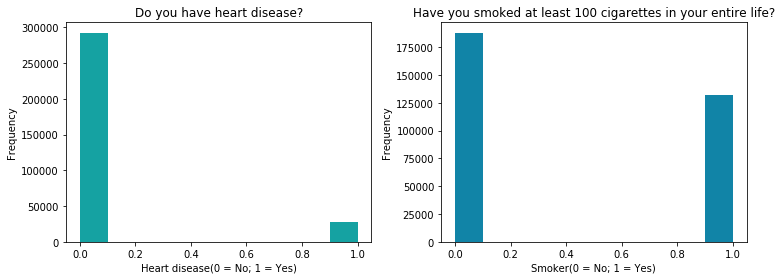

In [40]:
fig = plt.figure(figsize = (11, 4))

ax1 = fig.add_subplot(1, 2, 1)

ax1.hist(df["HeartDisease"], color = "#15A2A2")
plt.title("Do you have heart disease?")
plt.ylabel("Frequency")
plt.xlabel("Heart disease(0 = No; 1 = Yes)")

ax2 = fig.add_subplot(1, 2, 2)

ax2.hist(df["Smoking"], color = "#1184A7")
plt.title("Have you smoked at least 100 cigarettes in your entire life?")
plt.ylabel("Frequency")
plt.xlabel("Smoker(0 = No; 1 = Yes)")


plt.tight_layout()


Neither variable follow a Gaussian distribution since their p-value is smaller than our alpha of 0.05. Hence we will use the Mann-Whitney U Test.

In [6]:
#subsetting variables
non_smoker = df[df.Smoking == 0]["HeartDisease"]
smoker = df[df.Smoking == 1]["HeartDisease"]

In [7]:
scipy.stats.mannwhitneyu(smoker, non_smoker)

MannwhitneyuResult(statistic=11632981832.5, pvalue=0.0)

This test returns a p-value of 0.0, which does not mean it is equal to 0, but it is a very small number. It is, then, smaller than our alpha of 0.05 so we can reject the null hypothesis and conclude that they don't follow the same distribution.

# Exercici 3

Continua amb el conjunt de dades i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

We will test the following three variables: HeartDisease, AlcoholDrinking, and Stroke. Our null hypothesis (H0) is that these are related, and our alternative hypothesis (H1) is that they are independet. 

In [3]:
#using d'Agostino test
scipy.stats.normaltest(df["AlcoholDrinking"])

NormaltestResult(statistic=217748.18625880437, pvalue=0.0)

In [4]:
#using d'Agostino test
scipy.stats.normaltest(df["Stroke"])

NormaltestResult(statistic=298875.59122883406, pvalue=0.0)

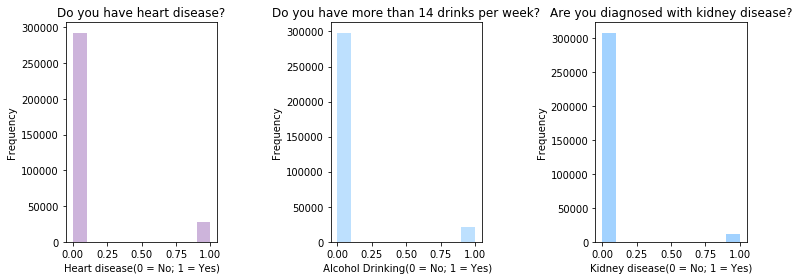

In [26]:
fig = plt.figure(figsize = (11, 4))

ax1 = fig.add_subplot(1, 3, 1)

ax1.hist(df["HeartDisease"], color = "#CDB4DB")
plt.title("Do you have heart disease?")
plt.ylabel("Frequency")
plt.xlabel("Heart disease(0 = No; 1 = Yes)")

ax2 = fig.add_subplot(1, 3, 2)

ax2.hist(df["AlcoholDrinking"], color = "#BDE0FE")
plt.title("Do you have more than 14 drinks per week?")
plt.ylabel("Frequency")
plt.xlabel(" Alcohol Drinking(0 = No; 1 = Yes)")

ax2 = fig.add_subplot(1, 3, 3)

ax2.hist(df["KidneyDisease"], color = "#A2D2FF")
plt.title("Are you diagnosed with kidney disease?")
plt.ylabel("Frequency")
plt.xlabel("Kidney disease(0 = No; 1 = Yes)")

plt.tight_layout()


None of the three categories have a Gaussian distribution, as the p-value returned is less than 0.05. We will then use the Kruskal-Wallis H test. 

In [20]:
#subsetting variables
drink_kidney = df[(df["AlcoholDrinking"] == 1) & (df["KidneyDisease"] == 1)]["HeartDisease"]
drink_nokidney = df[(df["AlcoholDrinking"] == 1) & (df["KidneyDisease"] == 0)]["HeartDisease"]
nodrink_nokidney = df[(df["AlcoholDrinking"] == 0) & (df["KidneyDisease"] == 0)]["HeartDisease"]
nodrink_kidney = df[(df["AlcoholDrinking"] == 0) & (df["KidneyDisease"] == 1)]["HeartDisease"]

In [21]:
scipy.stats.kruskal(drink_kidney, drink_nokidney, nodrink_nokidney, nodrink_kidney)

KruskalResult(statistic=6996.905642338482, pvalue=0.0)

The p-value returned is less than our alpha of 0.05, a very small value that has been rounded to 0.0. We can, therefore, reject our null hypothesis and we can conclude that one or more than one variable have different distribution.

In [22]:
scipy.stats.kruskal(drink_kidney, drink_nokidney, nodrink_kidney)

KruskalResult(statistic=3866.495960563548, pvalue=0.0)

In [23]:
scipy.stats.kruskal(drink_kidney, drink_nokidney, nodrink_nokidney)

KruskalResult(statistic=384.267791441562, pvalue=3.6083553640739774e-84)

In [24]:
scipy.stats.kruskal(drink_kidney, nodrink_nokidney, nodrink_kidney)

KruskalResult(statistic=6432.537507482069, pvalue=0.0)

In [25]:
scipy.stats.kruskal(drink_nokidney, nodrink_nokidney, nodrink_kidney)

KruskalResult(statistic=6905.503906115605, pvalue=0.0)

When removing each of the four variables and retesting each time, we can see that we still get the same results. The p value calculated for every test is much smaller than our alfa of 0.05, so we can reject our null hypothesis and we can draw the conslusion that they have different distribution.